In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

import octopus as oct

In [2]:
# T4 Dendrites

filenames =['SplitT4c_GC6f_SINGalldir_004_2021-04-21_13.42_Ftrace_mean_SINGalldir_T4dend',
            'SplitT4c_GC6f_SINGalldir_005_2021-04-21_14.41_Ftrace_mean_SINGalldir_T4dend',
            'SplitT4c_GC6f_SINGalldir_009_2021-04-23_14.55_Ftrace_mean_SINGalldir_T4dend',
            'SplitT4c_GC6f_SINGalldir_009_2021-04-26_17.11_Ftrace_mean_SINGalldir_T4dend',
            'SplitT4c_GC6f_SINGalldir_001_2021-04-28_11.15_Ftrace_mean_SINGalldir_T4dend',
            'SplitT4c_GC6f_SINGalldir_005_2021-05-12_13.26_Ftrace_mean_SINGalldir_T4dend',
            '2022_07_13_SplitT4c_GC6f_SING_007_2022-07-13_15.31_Ftrace_mean_SINGalldir_T4dend',
            '2022_07_15_SplitT4c_GC6f_SING_010_2022-07-15_14.47_Ftrace_mean_SINGalldir_T4dend',
            '2022_07_15_SplitT4c_GC6f_SING_015_2022-07-15_17.12_Ftrace_mean_SINGalldir_T4dend']

In [3]:
# T4 Axon Terminals

filenames =['SplitT4c_GC6f_SINGalldir_004_2021-04-21_13.42_Ftrace_mean_SINGalldir_axons',
            'SplitT4c_GC6f_SINGalldir_005_2021-04-21_14.41_Ftrace_mean_SINGalldir_axons',
            'SplitT4c_GC6f_SINGalldir_009_2021-04-23_14.55_Ftrace_mean_SINGalldir_axons',
            'SplitT4c_GC6f_SINGalldir_009_2021-04-26_17.11_Ftrace_mean_SINGalldir_axons',
            'SplitT4c_GC6f_SINGalldir_001_2021-04-28_11.15_Ftrace_mean_SINGalldir_axons',
            'SplitT4c_GC6f_SINGalldir_005_2021-05-12_13.26_Ftrace_mean_SINGalldir_axons',
            '2022_07_13_SplitT4c_GC6f_SING_007_2022-07-13_15.31_Ftrace_mean_SINGalldir_T4axons',
            '2022_07_15_SplitT4c_GC6f_SING_010_2022-07-15_14.47_Ftrace_mean_SINGalldir_T4axons',
            '2022_07_15_SplitT4c_GC6f_SING_015_2022-07-15_17.12_Ftrace_mean_SINGalldir_T4axons']

In [4]:
# Import Data
time = np.load('time_1s3p.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

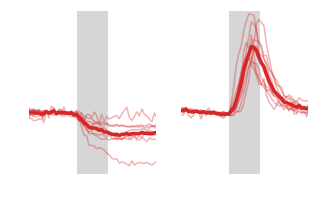

In [6]:
fig = plt.figure(figsize = (5,3))

ax = fig.add_subplot(121)
plt.plot(time,Ftrace_all[:,6,:], color = 'C3', alpha = 0.35, linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,6,:], axis=1), color = 'C3', linewidth = 3.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-3,5])
plt.axis('off') 

ax = fig.add_subplot(122)
plt.plot(time,Ftrace_all[:,2,:], color = 'C3', alpha = 0.35, linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C3', linewidth = 3.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-3,5])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_SplitT4c_GC6f_Ftraces_SING.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [7]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:52,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):55,i,j])

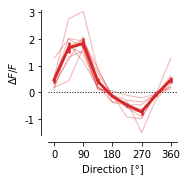

In [8]:
fig = plt.figure(figsize = (2.3,2.3))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(rotations, Ftrace_mean, color='C3', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(Ftrace_mean,1), linewidth = 2.5, color = 'C3')
plt.errorbar(rotations, np.mean(Ftrace_mean,1), yerr = Ftrace_sem, linewidth = 2.5, color = 'C3')

plt.xticks(rotations)
ax.set_xticklabels(rotations)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel(u'Direction [°]', fontsize = 10)
ax.set_ylabel('$\Delta F/F$', fontsize = 10)
xticks = np.array([0,90,180,270,360])
ax.set_xticklabels(xticks, size=10)
ax.set_xticks(xticks)
ax.set_yticks([-1, 0, 1, 2, 3])
ax.set_yticklabels(('-1','0','1','2', '3'), size=10)
plt.ylim([-1.6,3.1])
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#FigS2_SplitT4c_GC6f_DirTuning_SING.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()